In [1]:
import os
import requests
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
import re
import emoji

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
import nltk
nltk.download('stopwords')
sw = stopwords.words("english")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns
import html 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Blaven/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Blaven/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Blaven/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Blaven/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Data Loading 

In [2]:
df_new = pd.read_csv("/Users/Blaven/Desktop/Capstone Git Storage/clean_df")
df_new.head(5)


,Unnamed: 0,text,fraudulent,clean_text,token
0,0,"Marketing Intern We're Food52, and we've creat...",0,market intern be food weve create groundbreaki...,"['market', 'intern', 'be', 'food', 'weve', 'cr..."
1,1,Customer Service - Cloud Video Production 90 S...,0,customer service cloud video production second...,"['customer', 'service', 'cloud', 'video', 'pro..."
2,2,Commissioning Machinery Assistant (CMA) Valor ...,0,commission machinery assistant cma valor servi...,"['commission', 'machinery', 'assistant', 'cma'..."
3,3,Account Executive - Washington DC Our passion ...,0,account executive washington dc passion improv...,"['account', 'executive', 'washington', 'dc', '..."
4,4,Bill Review Manager SpotSource Solutions LLC i...,0,bill review manager spotsource solutions llc g...,"['bill', 'review', 'manager', 'spotsource', 's..."


In this section we will be exploring our data by looking at the various aspects such as checking null values, duplicates, class imbalance, data types. 

## Modeling 

### Imbalanced  Data Set

In [3]:
X=df_new.drop(['fraudulent','text', 'token','Unnamed: 0'], axis=1)
y=df_new['fraudulent']

type(X)

pandas.core.frame.DataFrame

In [4]:
X.shape

(17880, 1)

In [5]:
y.shape

(17880,)

## Featuree Engineering 

1) BoW

2) TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = set(nltk.corpus.stopwords.words('english'))



tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(X["clean_text"])
tfidf_text_vectors.shape

(17880, 18370)

In [7]:
count_text_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(X['clean_text'])
count_text_vectors.shape



(17880, 18370)

### Train-Test Split

In [8]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(tfidf_text_vectors,y, test_size=0.20,random_state=0,stratify=y)



X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(count_text_vectors,y, test_size=0.20,random_state=0,stratify=y)

In [9]:
y_train_tf.value_counts()

0    13611
1      693
Name: fraudulent, dtype: int64

In [10]:
y_train_bow.value_counts()

0    13611
1      693
Name: fraudulent, dtype: int64

# Modeling 

## Logistic Regression tfidf

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C= 3,solver= 'liblinear',random_state = 42)
logreg.fit(X_train_tf, y_train_tf)


LogisticRegression(C=3, random_state=42, solver='liblinear')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.95      0.57      0.71       173

    accuracy                           0.98      3576
   macro avg       0.96      0.78      0.85      3576
weighted avg       0.98      0.98      0.97      3576



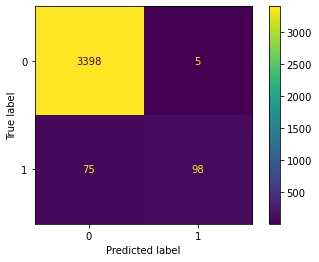

In [12]:
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



lr_predict = logreg.predict(X_test_tf)

print(classification_report(y_test_tf, lr_predict))


cm_lr =confusion_matrix(y_test_tf, lr_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.show()



In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy", accuracy_score(y_test_tf, lr_predict))


print("F1 Score", f1_score(y_test_tf, lr_predict))
print("Precision", precision_score(y_test_tf, lr_predict))
print("Recall", recall_score(y_test_tf, lr_predict))



Accuracy 0.9776286353467561
F1 Score 0.7101449275362318
Precision 0.9514563106796117
Recall 0.5664739884393064


## Logistic Regression Bow

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C= 3,solver= 'liblinear',random_state = 42)
logreg.fit(X_train_bow, y_train_bow)



LogisticRegression(C=3, random_state=42, solver='liblinear')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.85      0.75      0.80       173

    accuracy                           0.98      3576
   macro avg       0.92      0.87      0.89      3576
weighted avg       0.98      0.98      0.98      3576



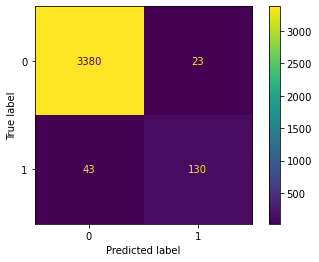

In [15]:
lr_predict = logreg.predict(X_test_bow)

print(classification_report(y_test_bow, lr_predict))


cm_lr =confusion_matrix(y_test_bow, lr_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.show()



In [16]:
print("Accuracy", accuracy_score(y_test_bow, lr_predict))


print("F1 Score", f1_score(y_test_bow, lr_predict))
print("Precision", precision_score(y_test_bow, lr_predict))
print("Recall", recall_score(y_test_bow, lr_predict))



Accuracy 0.9815436241610739
F1 Score 0.7975460122699387
Precision 0.8496732026143791
Recall 0.7514450867052023


## Random Forest tf-idf

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 300,max_depth = 300, random_state = 2)
rf.fit(X_train_tf, y_train_tf)


RandomForestClassifier(max_depth=300, n_estimators=300, random_state=2)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.98      0.69      0.81       173

    accuracy                           0.98      3576
   macro avg       0.98      0.84      0.90      3576
weighted avg       0.98      0.98      0.98      3576



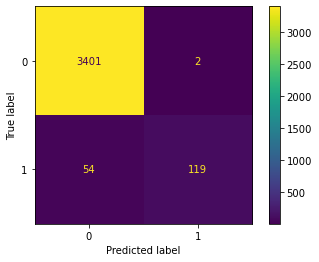

In [18]:

rf_predict = rf.predict(X_test_tf)

print(classification_report(y_test_tf, rf_predict))

cm_rf =confusion_matrix(y_test_tf, rf_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()




In [19]:

print("Accuracy", accuracy_score(y_test_tf, rf_predict))


print("F1 Score", f1_score(y_test_tf, rf_predict))
print("Precision", precision_score(y_test_tf, rf_predict))
print("Recall", recall_score(y_test_tf, rf_predict))




Accuracy 0.9843400447427293
F1 Score 0.8095238095238095
Precision 0.9834710743801653
Recall 0.6878612716763006


## Random Forest BoW

In [20]:
rf = RandomForestClassifier(n_estimators = 300,max_depth = 300, random_state = 2)
rf.fit(X_train_bow, y_train_bow)

RandomForestClassifier(max_depth=300, n_estimators=300, random_state=2)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.98      0.68      0.80       173

    accuracy                           0.98      3576
   macro avg       0.98      0.84      0.90      3576
weighted avg       0.98      0.98      0.98      3576



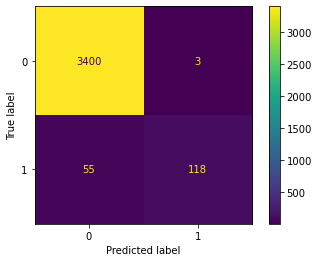

In [21]:

rf_predict = rf.predict(X_test_bow)

print(classification_report(y_test_bow, rf_predict))

cm_rf =confusion_matrix(y_test_bow, rf_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()





In [22]:
print("Accuracy", accuracy_score(y_test_bow, rf_predict))


print("F1 Score", f1_score(y_test_bow, rf_predict))
print("Precision", precision_score(y_test_bow, rf_predict))
print("Recall", recall_score(y_test_bow, rf_predict))





Accuracy 0.9837807606263982
F1 Score 0.8027210884353743
Precision 0.9752066115702479
Recall 0.6820809248554913


## Naive Bayes tf-idf

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

NB = MultinomialNB()
NB.fit(X_train_tf, y_train_tf)


MultinomialNB()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3403
           1       0.69      0.13      0.21       173

    accuracy                           0.95      3576
   macro avg       0.82      0.56      0.60      3576
weighted avg       0.94      0.95      0.94      3576



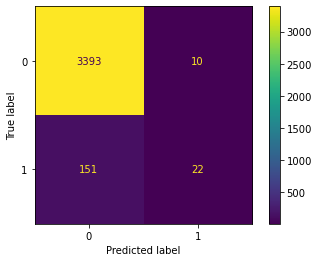

In [24]:

nb_predict = NB.predict(X_test_tf)

print(classification_report(y_test_tf, nb_predict))

cm_nb =confusion_matrix(y_test_tf, nb_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()
plt.show()





In [25]:

print("Accuracy", accuracy_score(y_test_tf, nb_predict))


print("F1 Score", f1_score(y_test_tf, nb_predict))
print("Precision", precision_score(y_test_tf, nb_predict))
print("Recall", recall_score(y_test_tf, nb_predict))





Accuracy 0.9549776286353467
F1 Score 0.21463414634146338
Precision 0.6875
Recall 0.12716763005780346


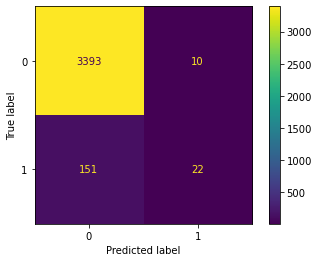

In [26]:

cm_nb =confusion_matrix(y_test_tf, nb_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()
plt.show()

## Naive Bayes BoW

In [27]:
NB = MultinomialNB()
NB.fit(X_train_bow, y_train_bow)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3403
           1       0.44      0.79      0.57       173

    accuracy                           0.94      3576
   macro avg       0.71      0.87      0.77      3576
weighted avg       0.96      0.94      0.95      3576



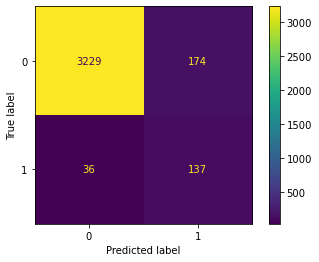

In [28]:

nb_predict = NB.predict(X_test_bow)

print(classification_report(y_test_bow, nb_predict))

cm_nb =confusion_matrix(y_test_bow, nb_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()
plt.show()






In [29]:

print("Accuracy", accuracy_score(y_test_bow, nb_predict))


print("F1 Score", f1_score(y_test_bow, nb_predict))
print("Precision", precision_score(y_test_bow, nb_predict))
print("Recall", recall_score(y_test_bow, nb_predict))






Accuracy 0.9412751677852349
F1 Score 0.5661157024793388
Precision 0.4405144694533762
Recall 0.791907514450867


## Multi Layer Perceptron tf-idf

In [30]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', 
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,2), 
                    random_state=5,
                    max_iter = 1000)  
mlp.fit(X_train_tf,y_train_tf)


MLPClassifier(hidden_layer_sizes=(100, 50, 2), max_iter=2000, random_state=5)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.86      0.79      0.83       173

    accuracy                           0.98      3576
   macro avg       0.93      0.89      0.91      3576
weighted avg       0.98      0.98      0.98      3576



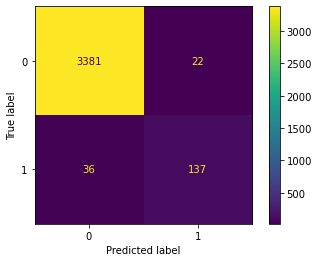

In [31]:
mlp_predict = mlp.predict(X_test_tf)

print(classification_report(y_test_tf, mlp_predict))

cm_mlp =confusion_matrix(y_test_tf, mlp_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp.plot()
plt.show()





In [32]:

print("Accuracy", accuracy_score(y_test_tf, mlp_predict))


print("F1 Score", f1_score(y_test_tf, mlp_predict))
print("Precision", precision_score(y_test_tf, mlp_predict))
print("Recall", recall_score(y_test_tf, mlp_predict))






Accuracy 0.9837807606263982
F1 Score 0.8253012048192772
Precision 0.8616352201257862
Recall 0.791907514450867


## Multi Layer Perceptron BoW


In [33]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', 
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,30), 
                    max_iter = 1000) 
mlp.fit(X_train_bow,y_train_bow)



MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=1000)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.84      0.79      0.81       173

    accuracy                           0.98      3576
   macro avg       0.92      0.89      0.90      3576
weighted avg       0.98      0.98      0.98      3576



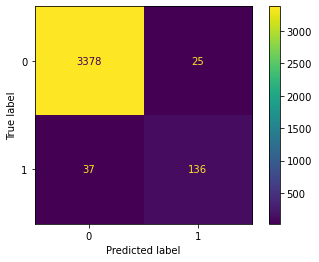

In [34]:
mlp_predict = mlp.predict(X_test_bow)

print(classification_report(y_test_bow, mlp_predict))

cm_mlp =confusion_matrix(y_test_bow, mlp_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp.plot()
plt.show()




In [35]:

print("Accuracy", accuracy_score(y_test_bow, mlp_predict))


print("F1 Score", f1_score(y_test_bow, mlp_predict))
print("Precision", precision_score(y_test_bow, mlp_predict))
print("Recall", recall_score(y_test_bow, mlp_predict))







Accuracy 0.982662192393736
F1 Score 0.8143712574850299
Precision 0.84472049689441
Recall 0.7861271676300579


## KNN tf-idf

Text(0.5, 1.0, 'Elbow curve')

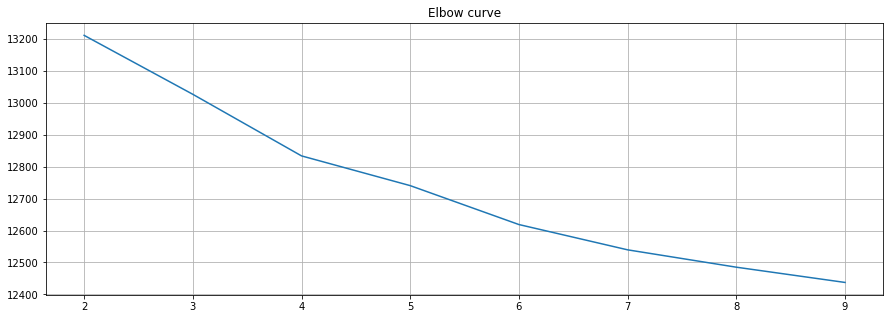

In [36]:

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = X_train_tf
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6,weights = 'uniform')

knn.fit(X_train_tf,y_train_tf)



KNeighborsClassifier(n_neighbors=6)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.89      0.65      0.75       173

    accuracy                           0.98      3576
   macro avg       0.94      0.82      0.87      3576
weighted avg       0.98      0.98      0.98      3576



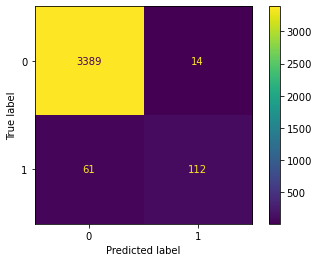

In [38]:

knn_predict = knn.predict(X_test_tf)

print(classification_report(y_test_tf, knn_predict))


cm_knn =confusion_matrix(y_test_tf, knn_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()



In [39]:

print("Accuracy", accuracy_score(y_test_tf, knn_predict))


print("F1 Score", f1_score(y_test_tf, knn_predict))
print("Precision", precision_score(y_test_tf, knn_predict))
print("Recall", recall_score(y_test_tf, knn_predict))








Accuracy 0.9790268456375839
F1 Score 0.7491638795986622
Precision 0.8888888888888888
Recall 0.6473988439306358


## KNN BoW

In [40]:
knn = KNeighborsClassifier(n_neighbors=6,weights = 'uniform')

knn.fit(X_train_bow,y_train_bow)



KNeighborsClassifier(n_neighbors=6)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3403
           1       0.47      0.65      0.55       173

    accuracy                           0.95      3576
   macro avg       0.73      0.81      0.76      3576
weighted avg       0.96      0.95      0.95      3576



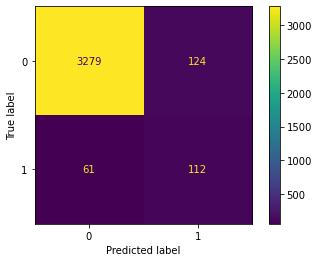

In [41]:

knn_predict = knn.predict(X_test_bow)

print(classification_report(y_test_bow, knn_predict))


cm_knn =confusion_matrix(y_test_bow, knn_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()




In [42]:

print("Accuracy", accuracy_score(y_test_bow, knn_predict))


print("F1 Score", f1_score(y_test_bow, knn_predict))
print("Precision", precision_score(y_test_bow, knn_predict))
print("Recall", recall_score(y_test_bow, knn_predict))









Accuracy 0.9482662192393736
F1 Score 0.547677261613692
Precision 0.4745762711864407
Recall 0.6473988439306358


## Support Vector Machine tf-idf

In [43]:
from sklearn.svm import SVC

svc = SVC(C= 2.0, kernel = 'linear',gamma = 'auto' ,probability=True )

svc.fit(X_train_tf, y_train_tf)


SVC(C=2.0, gamma='auto', kernel='linear', probability=True)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.94      0.73      0.82       173

    accuracy                           0.98      3576
   macro avg       0.96      0.87      0.91      3576
weighted avg       0.98      0.98      0.98      3576



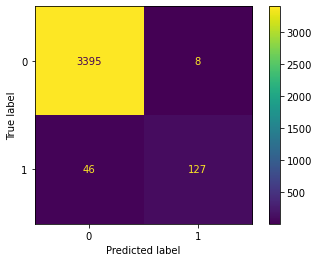

In [44]:

svm_predict = svc.predict(X_test_tf)

print(classification_report(y_test_tf, svm_predict))

cm_svm =confusion_matrix(y_test_tf, svm_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.show()



In [45]:

print("Accuracy", accuracy_score(y_test_tf, svm_predict))


print("F1 Score", f1_score(y_test_tf, svm_predict))
print("Precision", precision_score(y_test_tf, svm_predict))
print("Recall", recall_score(y_test_tf, svm_predict))




Accuracy 0.9848993288590604
F1 Score 0.8246753246753246
Precision 0.9407407407407408
Recall 0.7341040462427746


## SVM BoW

In [46]:
svc = SVC(C= 2.0, kernel = 'linear',gamma = 'auto' ,probability=True )

svc.fit(X_train_bow, y_train_bow)

SVC(C=2.0, gamma='auto', kernel='linear', probability=True)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.74      0.80      0.77       173

    accuracy                           0.98      3576
   macro avg       0.86      0.89      0.88      3576
weighted avg       0.98      0.98      0.98      3576



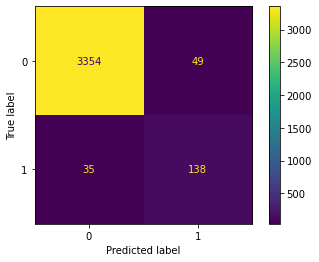

In [47]:

svm_predict = svc.predict(X_test_bow)

print(classification_report(y_test_bow, svm_predict))

cm_svm =confusion_matrix(y_test_bow, svm_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.show()




In [48]:

print("Accuracy", accuracy_score(y_test_bow, svm_predict))


print("F1 Score", f1_score(y_test_bow, svm_predict))
print("Precision", precision_score(y_test_bow, svm_predict))
print("Recall", recall_score(y_test_bow, svm_predict))





Accuracy 0.9765100671140939
F1 Score 0.7666666666666666
Precision 0.7379679144385026
Recall 0.7976878612716763


## AUC  Curve  of TF-IDF Vectorizer

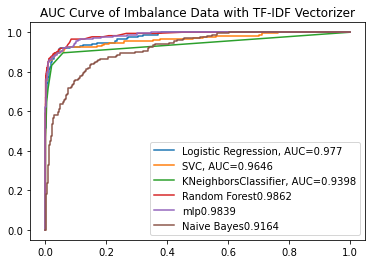

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

plt.figure(0).clf()
plt.title("AUC Curve of Imbalance Data with TF-IDF Vectorizer")

#fit logistic regression model and plot ROC curve
lr = LogisticRegression(C= 3,solver= 'liblinear',random_state = 42)
lr.fit(X_train_tf, y_train_tf)
y_pred_lr = lr.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_lr)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
svc = SVC(C= 2.0, kernel = 'linear',gamma = 'auto' ,probability=True )
svc.fit(X_train_tf, y_train_tf)
y_pred_svc = svc.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_svc)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_svc), 4)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))



#fit gradient boosted model and plot ROC curve
knn = KNeighborsClassifier(n_neighbors=6,weights = 'uniform')
knn.fit(X_train_tf, y_train_tf)
y_pred_knn = knn.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_knn)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_knn), 4)
plt.plot(fpr,tpr,label="KNeighborsClassifier, AUC="+str(auc))


rf = RandomForestClassifier(n_estimators = 300,max_depth = 300, random_state = 2)
rf.fit(X_train_tf, y_train_tf)
y_pred_rf = rf.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_rf)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest"+str(auc))

mlp = MLPClassifier(solver='adam', 
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,2), 
                    random_state=5,
                    max_iter = 1000)  
mlp.fit(X_train_tf,y_train_tf)
y_pred_mlp = mlp.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_mlp)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_mlp), 4)
plt.plot(fpr,tpr,label="mlp"+str(auc))



nb = MultinomialNB()
nb.fit(X_train_tf, y_train_tf)
y_pred_nb = nb.predict_proba(X_test_tf)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_nb)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_nb), 4)
plt.plot(fpr,tpr,label="Naive Bayes"+str(auc))



#add legend
plt.legend()




## AUC of BoW Vectorizer

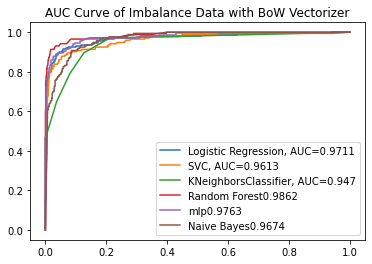

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

plt.figure(0).clf()

plt.title("AUC Curve of Imbalance Data with BoW Vectorizer")

#fit logistic regression model and plot ROC curve
lr = LogisticRegression(C= 3,solver= 'liblinear',random_state = 42)
lr.fit(X_train_bow, y_train_bow)
y_pred_lr = lr.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_bow, y_pred_lr)
auc = round(metrics.roc_auc_score(y_test_bow, y_pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
svc = SVC(C= 2.0, kernel = 'linear',gamma = 'auto' ,probability=True )
svc.fit(X_train_bow, y_train_bow)
y_pred_svc = svc.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_bow, y_pred_svc)
auc = round(metrics.roc_auc_score(y_test_bow, y_pred_svc), 4)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc))



#fit gradient boosted model and plot ROC curve
knn = KNeighborsClassifier(n_neighbors=6,weights = 'uniform')
knn.fit(X_train_bow, y_train_bow)
y_pred_knn = knn.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_bow, y_pred_knn)
auc = round(metrics.roc_auc_score(y_test_bow, y_pred_knn), 4)
plt.plot(fpr,tpr,label="KNeighborsClassifier, AUC="+str(auc))


rf = RandomForestClassifier(n_estimators = 300,max_depth = 300, random_state = 2)
rf.fit(X_train_bow, y_train_bow)
y_pred_rf = rf.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_bow, y_pred_rf)
auc = round(metrics.roc_auc_score(y_test_bow, y_pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest"+str(auc))

mlp = MLPClassifier(solver='adam', 
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,2), 
                    random_state=5,
                    max_iter = 1000)   
mlp.fit(X_train_bow,y_train_bow)
y_pred_mlp = mlp.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_bow, y_pred_mlp)
auc = round(metrics.roc_auc_score(y_test_bow, y_pred_mlp), 4)
plt.plot(fpr,tpr,label="mlp"+str(auc))



nb = MultinomialNB()
nb.fit(X_train_bow, y_train_bow)
y_pred_nb = nb.predict_proba(X_test_bow)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_bow, y_pred_nb)
auc = round(metrics.roc_auc_score(y_test_bow, y_pred_nb), 4)
plt.plot(fpr,tpr,label="Naive Bayes"+str(auc))



#add legend
plt.legend()





## Tune Testing

In [ ]:
#Hyper tune testing


#from sklearn.model_selection import GridSearchCV
  
# Support Vector Machine


# defining parameter range
#param_grid = {'C': [0.1, 1,2,10 ], 
#              'kernel': ['rbf',linear]} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
#grid.fit(X_train_bow,y_train_bow)


# Random Forest
#param_grid = {'C': [0.1, 1,2,10 ], 
#              'kernel': ['rbf',linear]} 
  
# grid = GridSearchCV(base_estimator, param_grid, cv=5,
#                         factor=2, resource='n_estimators',
#                        max_resources=300)
  
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
#grid= {C = np.logspace(-4, 4, 50)
#    penalty = ['l1', 'l2']}
#logreg=LogisticRegression()    
    
    
# fitting the model for grid search
#grid.fit(X_train_bow,y_train_bow)
